In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_cbn_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBN
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.137931
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.137931
2,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.137931
3,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.137931
4,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.103448
74996,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.103448
74997,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.103448
74998,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.103448


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..CBN', 'index'], axis = 1)
y = df_knn[['X..CBN']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.13793103],
       [0.13793103],
       [0.13793103],
       ...,
       [0.10344828],
       [0.10344828],
       [0.10344828]])

<AxesSubplot:ylabel='Count'>

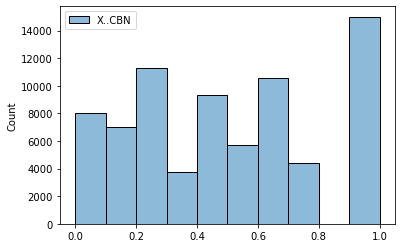

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.06823974262774264

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.017748505269637557

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.13322351620355002

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8952185872980885

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.820146050325584

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([9.36321646e-02, 7.82428430e-02, 8.92225449e-02, 7.88843994e-02,
       9.74851686e-02, 1.99446340e-02, 4.21875809e-03, 4.79770968e-02,
       2.08718741e-04, 1.60381353e-03, 2.91315657e-03, 3.72653191e-09,
       5.98478133e-03, 1.35842594e-04, 2.84664301e-03, 2.66407842e-03,
       6.17724168e-03, 3.79441653e-03, 5.88858306e-09, 7.89553762e-03,
       5.89624990e-09, 1.00986507e-08, 5.55822964e-03, 6.47781995e-03,
       6.93813423e-03, 2.38067140e-03, 4.53317218e-03, 1.54953064e-04,
       7.99728805e-09, 1.40330668e-03, 6.36246864e-03, 6.27740912e-08,
       4.40465912e-03, 0.00000000e+00, 2.43460249e-07, 3.40521772e-03,
       3.67066143e-03, 9.48031372e-03, 2.71170539e-04, 1.59971729e-02,
       7.11946378e-05, 9.08978045e-03, 8.05295087e-05, 2.28062481e-02,
       1.40999801e-03, 2.34199167e-01, 9.27318241e-04, 2.24810858e-04,
       1.10610285e-02, 1.22281195e-03, 2.01249957e-02, 4.65847690e-03,
       3.57195409e-03, 7.72793412e-04, 2.95824135e-03, 1.25314670e-03,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,apple,blueberry,cheese,diesel,orange
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0
2,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,1,0,0
3,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,1,0,0
4,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0,0,0,0
74996,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0,0,0,0
74997,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'sativa',
 'apple',
 'blueberry',
 'cheese',
 'diesel',
 'orange']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_cbn.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_cbn.pkl")

['selector_knn_lsa_elbow_cbn.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.07140097708645124

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.01855058636215941

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.13620053730495857

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8892826880137042

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8106952896556068

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [39]:
knreg_ht = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [40]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.03752160419234929

In [41]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.10797826559108402

In [42]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9844305326954422

In [43]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8810193127171819

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [44]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [45]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_cbn.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_cbn.pkl")

['y_test_knreg_lsa_elbow_cbn.pkl']

In [46]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03676150249728464

In [47]:
mean_squared_error(y_test, y_pred_knreg_test)

0.01169621418879882

In [48]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.10814903692959461

In [49]:
r2_score(y_test, y_pred_knreg_test)

0.881479877265553

In [50]:
y_test

,X..CBN
11591,0.931034
52020,0.413793
34666,0.310345
22169,0.517241
23049,0.517241
...,...
60863,0.758621
32316,0.190805
60933,0.758621
43206,0.436782


In [51]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

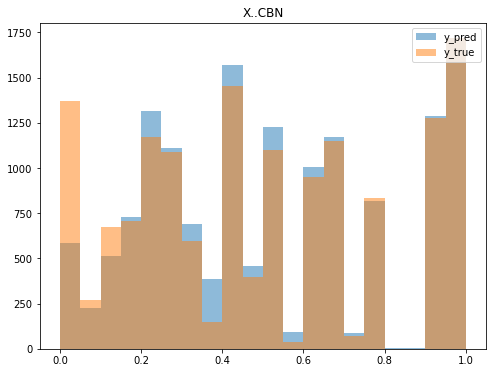

<Figure size 432x288 with 0 Axes>

In [52]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBN"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_cbn.png')

Pearson R

In [53]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.942
P-value: 0.000


<AxesSubplot:>

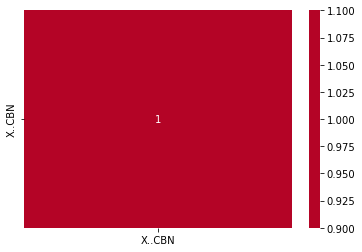

In [54]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)